# TensorFlow Regression Code

The Data
We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.    

Feature Columns:

id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 1- Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

## 2- Reading the data

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## 3- Data Cleaning

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4- EDA and Visualization

#### 4-1- Price Distribution

Text(0, 0.5, 'Frequency')

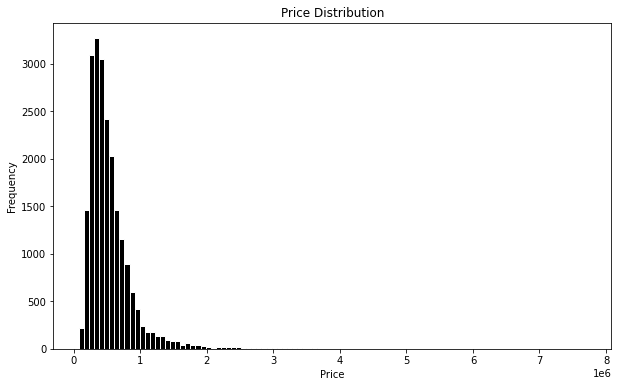

In [7]:
plt.figure(figsize=(10,6))

plt.hist(x='price', bins=100, data=df, edgecolor='w',color='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Most of the houses have a price between 0 to 1.5 million dollar.

#### 4-2- Counting the Number of Bedrooms

Text(0.5, 0, 'Bedrooms')

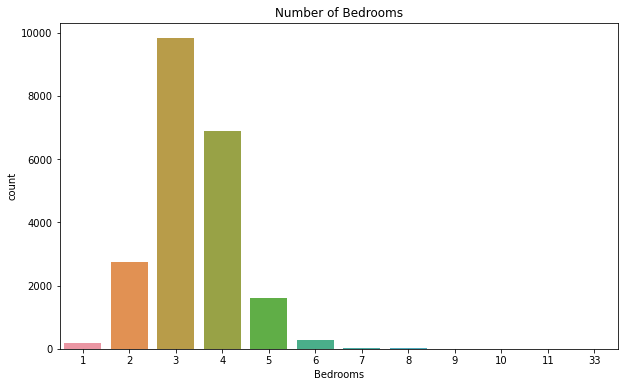

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='bedrooms',data=df)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')

A vast majority of these houses have 2 to 5 bedrooms.

#### 4-3- Plotting the Relationship Between Price and Some Correlated Features

In [9]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

The square feet of living space has a high correlation with the price of the house.

Now we explore the scatter plots of price with features that have a high correlation with it.

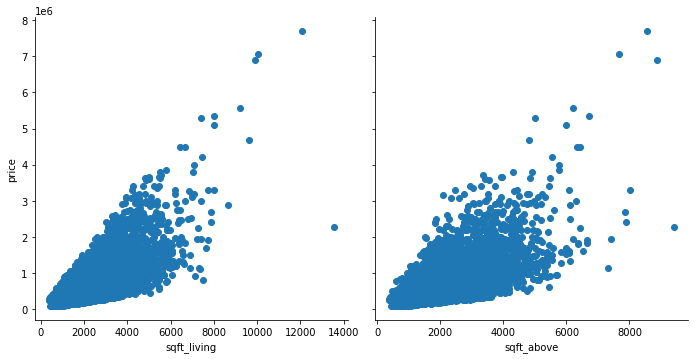

In [10]:
new=sns.PairGrid(df,x_vars=['sqft_living', 'sqft_above'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

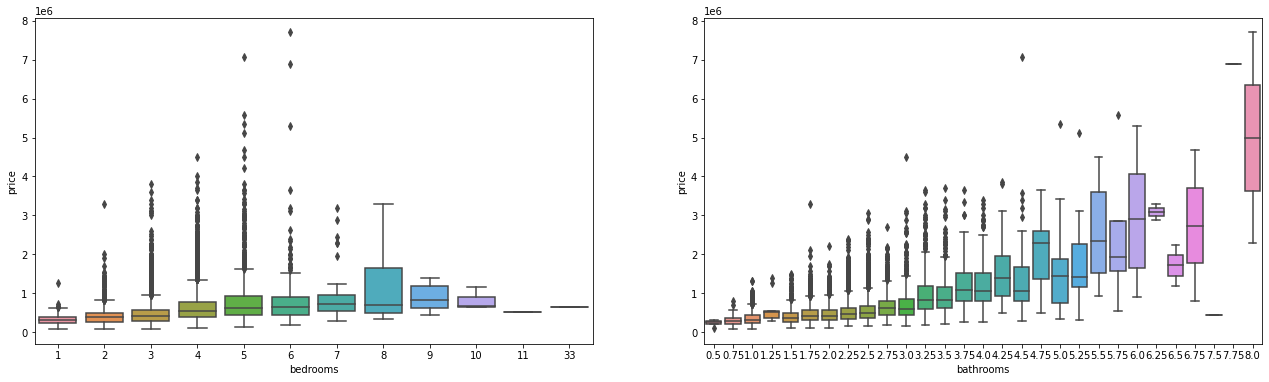

In [11]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,1)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='bathrooms', y='price', data=df)

Text(0, 0.5, '')

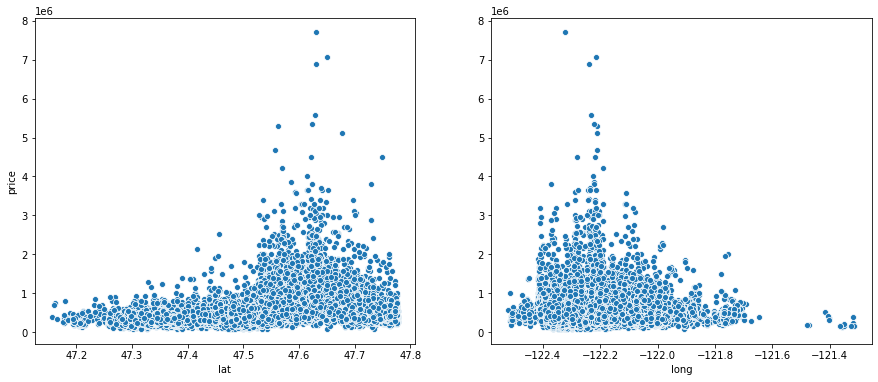

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot( x='lat',y='price', data=df)
plt.subplot(1,2,2)
sns.scatterplot( x='long',y='price', data=df)
plt.ylabel('')

It seems in some geographical lattitude and longitudes, the prices of houses are higher.

#### 4-4- Geographical Properties

Text(0, 0.5, 'Lattitude')

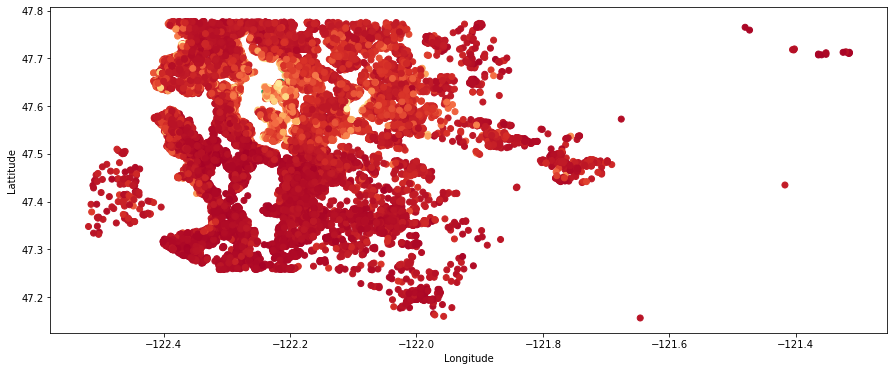

In [13]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

We see the lattitude versus longitude is similar to the map of Seattle.

We can see that the color gradient is not visible enough due to the outliers.

We will drop the top %1 of houses with high prices and create a new dataframe.

In [14]:
df.shape

(21597, 21)

In [15]:
21597*0.01

215.97

In [16]:
new=df.sort_values(by='price', ascending=False).iloc[216:]

In [17]:
new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


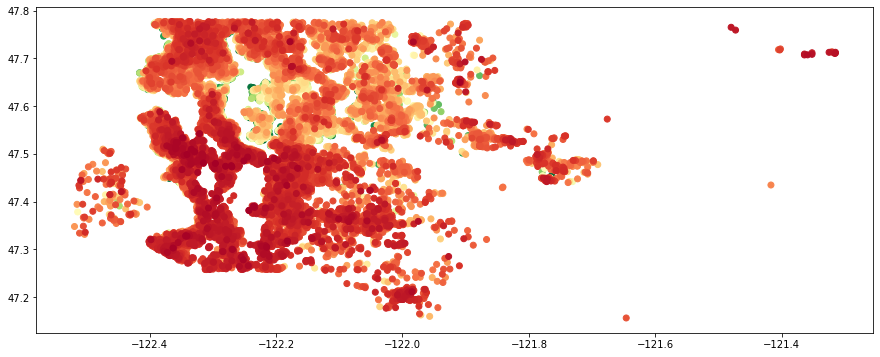

In [18]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=new, c='price',cmap='RdYlGn')

We can see at the edge of water, the price of houses is higher.

#### 4-5- Distribution of Prices versus Waterfront 

<AxesSubplot:xlabel='waterfront', ylabel='price'>

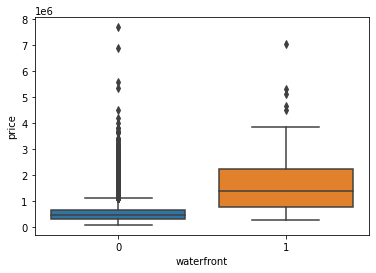

In [19]:
sns.boxplot(x='waterfront', y='price',data=df)

We see that if the houses are located at the waterfront, their prices are higher.

#### 4-6- Feature Engineering

First we drop the id column

In [20]:
df.drop(['id'],axis=1, inplace=True)

Second we add the year and month columns to the dataframe

In [21]:
df['date']=pd.to_datetime(df['date'])

In [22]:
df['year']=df['date'].apply(lambda x: x.year)
df['month']=df['date'].apply(lambda x: x.month)

In [23]:
df.drop(['date'], axis=1,inplace=True)

Third, we convert the zipcode and yr_renovated columns to a categorical columns.

In [ ]:
le=LabelEncoder()

In [25]:
le.fit(df['zipcode'])

LabelEncoder()

In [26]:
df['zipcode']=le.transform(df['zipcode'])

In [27]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We see that most of the houses were not renovated. So instead of this column, we add a categorical column that shows whether the house was renovated or not.

In [28]:
df['renovated']=df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [29]:
df.drop(['yr_renovated'], axis=1,inplace=True)

#### 4-7- Variation of price versus month and year

<AxesSubplot:xlabel='month', ylabel='price'>

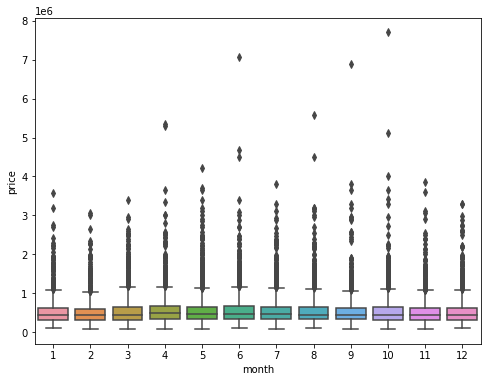

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='month',y='price',data=df)

From the above plot, it is hard to interpret the data

<AxesSubplot:xlabel='month'>

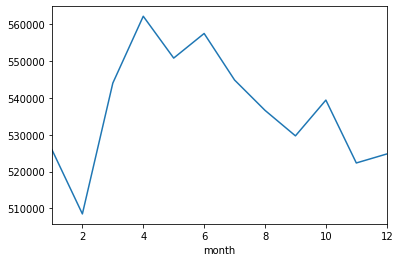

In [31]:
df.groupby('month').mean()['price'].plot()

The mean price in the 4th month is maximum

<AxesSubplot:xlabel='year', ylabel='price'>

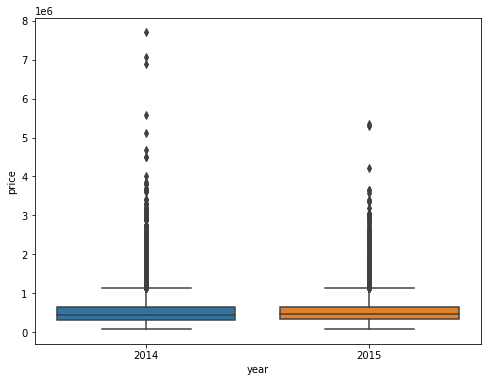

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='year'>

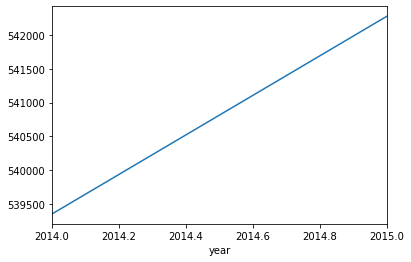

In [33]:
df.groupby('year').mean()['price'].plot()

The mean price increases between 2014 and 2015.

## 5- Splitting the Data

In [41]:
X=df.drop(['price'],axis=1).values
y=df['price'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 6- Scaling

In [43]:
mms=MinMaxScaler()

In [44]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
X_train=mms.transform(X_train)

In [46]:
X_test=mms.transform(X_test)

## 7- Creating the Model

In [47]:
df.shape

(21597, 21)

In [67]:
model=Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## 8- Training the model

In [68]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400 )

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430241710080.0000 - val_loss: 418913878016.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428720586752.0000 - val_loss: 413364944896.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 405352185856.0000 - val_loss: 360030273536.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 297923837952.0000 - val_loss: 201161228288.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 141581778944.0000 - val_loss: 100675674112.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100902010880.0000 - val_loss: 96475725824.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 98585624576.0000 - val_loss: 94725570560.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96754343936.0000 - val_loss: 92977717248.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 34719248384.0000 - val_loss: 33868144640.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 34528534528.0000 - val_loss: 33695674368.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 34421542912.0000 - val_loss: 33542467584.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 34197442560.0000 - val_loss: 33381851136.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 34054815744.0000 - val_loss: 33268877312.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 33900355584.0000 - val_loss: 33107976192.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 33743970304.0000 - val_loss: 32994316288.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 33612044288.0000 - val_loss: 32878460928.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 29912631296.0000 - val_loss: 29561544704.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 29936861184.0000 - val_loss: 29687844864.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 29861945344.0000 - val_loss: 29512486912.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 29850568704.0000 - val_loss: 29741537280.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 29821624320.0000 - val_loss: 29419962368.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 29781831680.0000 - val_loss: 29358981120.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 29756346368.0000 - val_loss: 29398319104.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 29766563840.0000 - val_loss: 29374564352.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 28512419840.0000 - val_loss: 28117248000.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 28507848704.0000 - val_loss: 28089745408.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 28549361664.0000 - val_loss: 28148787200.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 28444317696.0000 - val_loss: 28026898432.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 28456531968.0000 - val_loss: 28178464768.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 28426362880.0000 - val_loss: 28069783552.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 28406939648.0000 - val_loss: 28101472256.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 28430880768.0000 - val_loss: 28210587648.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27358322688.0000 - val_loss: 27041409024.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 27350138880.0000 - val_loss: 27014021120.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 27329943552.0000 - val_loss: 26975375360.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 27325470720.0000 - val_loss: 27187359744.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 27291080704.0000 - val_loss: 26848608256.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 27302158336.0000 - val_loss: 27013265408.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 27268227072.0000 - val_loss: 27108630528.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 27282167808.0000 - val_loss: 26783557632.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26365677568.0000 - val_loss: 26268389376.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 26369748992.0000 - val_loss: 26025764864.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 26359871488.0000 - val_loss: 26061060096.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 26310039552.0000 - val_loss: 26475425792.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 26341840896.0000 - val_loss: 25951696896.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 26316752896.0000 - val_loss: 26096580608.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 26295789568.0000 - val_loss: 25920425984.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 26299258880.0000 - val_loss: 25967452160.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 25564864512.0000 - val_loss: 25145980928.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 25570947072.0000 - val_loss: 25167476736.0000


## 9- Evaluation

#### 9-1- Training Loss per Epoch

In [69]:
loss_df=pd.DataFrame(model.history.history)

Text(0, 0.5, 'Loss')

<Figure size 720x576 with 0 Axes>

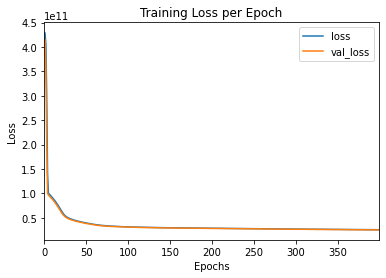

In [70]:
plt.figure(figsize=(10,8))
loss_df.plot()
plt.title('Training Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')

#### 9-2- Evaluation on  test dataset

In [71]:
model.evaluate(X_test,y_test,verbose=0)

25167478784.0

#### 9-3- Evaluation on  train dataset

In [72]:
model.evaluate(X_train,y_train,verbose=0)

25482665984.0

#### 9-4- Further Evaluations (MAE, MSE, RMSE)

In [73]:
prediction=model.predict(X_test)

Text(0, 0.5, 'Predicted Price')

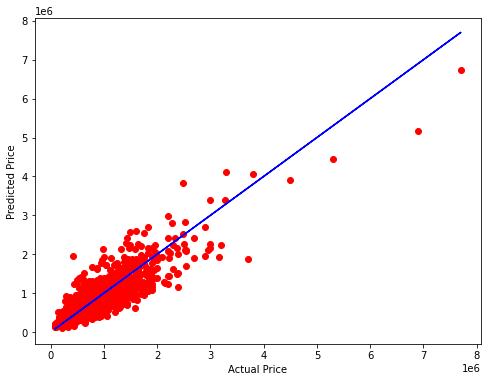

In [74]:
plt.figure(figsize=(8,6))

plt.plot(y_test,y_test, color='b')
plt.scatter(y_test,prediction,color='r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [75]:
metrics.mean_absolute_error(y_test,prediction)

97835.49759235147

In [76]:
metrics.mean_squared_error(y_test,prediction)

25167475632.076157

In [77]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

158642.6034584536

In [88]:
df.describe()['price'].loc['mean']

540296.5735055795

We see that the mean of price is about $540,000, and regarding the MAE, our predicted price values are around 18% off the mean price value. 

## 9- Predicting on brand new data

In [79]:
new=df.drop(['price'],axis=1).iloc[0]

In [80]:
new.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        6.60000e+01,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01,  0.00000e+00])

In [81]:
X_train.shape

(15117, 20)

In [82]:
new=new.values.reshape(-1,20)

In [83]:
new=mms.transform(new)

In [84]:
model.predict(new)

array([[268207.6]], dtype=float32)

In [89]:
df['price'].iloc[0]

221900.0

The true price is 221900 dollar  but  the  predicted price is  268207.6 dollar.